# Example - 10 - Neptune Aerocapture - Part 1

In this example, we will create combined interplanetary and aerocapture feasibility charts for Neptune.

We re-create the feasibility chart from the paper "Girija, Saikia, Longuski et al. Feasibility and Performance Analysis of Neptune Aerocapture Using Heritage Blunt-Body Aeroshells, Journal of Spacecraft and Rockets, June, 2020, In press. DOI: 10.2514/1.A34719

In [3]:
from AMAT.planet import Planet
from AMAT.vehicle import Vehicle

import numpy as np
from scipy import interpolate
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.patches import Polygon
import os

In [4]:
# Create a planet object
planet=Planet("NEPTUNE")

# Load an nominal atmospheric profile with height, temp, pressure, density data
planet.loadAtmosphereModel('../atmdata/Neptune/neptune-gram-avg.dat', 0 , 7 ,6, 5 , \
                           heightInKmFlag=True)

vinf_kms_array = np.linspace( 0.0,   30.0,  11)
LD_array       = np.linspace( 0.0,    1.0 , 11)

#vinf_kms_array = np.linspace( 0.0,   30.0,  2)
#LD_array       = np.linspace( 0.0,    1.0 , 2)

In [5]:
os.makedirs('../data/girijaSaikia2019b')
runID = '20DAY'

num_total      = len(vinf_kms_array)*len(LD_array)
count = 1

v0_kms_array    = np.zeros(len(vinf_kms_array))
v0_kms_array[:] = np.sqrt(1.0*(vinf_kms_array[:]*1E3)**2.0 + \
                          2*np.ones(len(vinf_kms_array))*\
                          planet.GM/(planet.RP+1000.0*1.0E3))/1.0E3

overShootLimit_array  = np.zeros((len(v0_kms_array),len(LD_array))) 
underShootLimit_array = np.zeros((len(v0_kms_array),len(LD_array))) 
exitflag_os_array     = np.zeros((len(v0_kms_array),len(LD_array))) 
exitflag_us_array     = np.zeros((len(v0_kms_array),len(LD_array))) 
TCW_array             = np.zeros((len(v0_kms_array),len(LD_array))) 

In [6]:
for i in range(0,len(v0_kms_array)):
    for j in range(0,len(LD_array)):
        vehicle=Vehicle('Trident', 1000.0, 200.0, LD_array[j], 3.1416, 0.0, 1.00, planet)
        vehicle.setInitialState(1000.0,0.0,0.0,v0_kms_array[i],0.0,-4.5,0.0,0.0)
        vehicle.setSolverParams(1E-6)
        overShootLimit_array[i,j],  exitflag_os_array[i,j]  = vehicle.findOverShootLimit (2400.0, 0.1, -80.0, -4.0, 1E-10, 1553575.10)
        underShootLimit_array[i,j], exitflag_us_array[i,j] =  vehicle.findUnderShootLimit(2400.0, 0.1, -80.0, -4.0, 1E-10, 1553575.10)

        TCW_array[i,j] = overShootLimit_array[i,j] - underShootLimit_array[i,j]

        print("Run #"+str(count)+" of "+ str(num_total)+": Arrival V_infty: "+str(vinf_kms_array[i])+" km/s"+", L/D:"+str(LD_array[j]) + " OSL: "+str(overShootLimit_array[i,j])+" USL: "+str(underShootLimit_array[i,j])+", TCW: "+str(TCW_array[i,j])+" EFOS: "+str(exitflag_os_array[i,j])+ " EFUS: "+str(exitflag_us_array[i,j]))
        count = count +1

np.savetxt('../data/girijaSaikia2019b/'+runID+'vinf_kms_array.txt',vinf_kms_array)				
np.savetxt('../data/girijaSaikia2019b/'+runID+'v0_kms_array.txt',v0_kms_array)		
np.savetxt('../data/girijaSaikia2019b/'+runID+'LD_array.txt',LD_array)		
np.savetxt('../data/girijaSaikia2019b/'+runID+'overShootLimit_array.txt',overShootLimit_array)
np.savetxt('../data/girijaSaikia2019b/'+runID+'exitflag_os_array.txt',exitflag_os_array)
np.savetxt('../data/girijaSaikia2019b/'+runID+'undershootLimit_array.txt',underShootLimit_array)
np.savetxt('../data/girijaSaikia2019b/'+runID+'exitflag_us_array.txt',exitflag_us_array)
np.savetxt('../data/girijaSaikia2019b/'+runID+'TCW_array.txt',TCW_array)

Run #1 of 4: Arrival V_infty: 0.0 km/s, L/D:0.0 OSL: -10.88548090497352 USL: -10.88548090497352, TCW: 0.0 EFOS: 1.0 EFUS: 1.0
Run #2 of 4: Arrival V_infty: 0.0 km/s, L/D:1.0 OSL: -10.83489821571493 USL: -10.93779864834869, TCW: 0.10290043263375992 EFOS: 1.0 EFUS: 1.0
Run #3 of 4: Arrival V_infty: 30.0 km/s, L/D:0.0 OSL: -14.18370732049516 USL: -14.18370732049516, TCW: 0.0 EFOS: 1.0 EFUS: 1.0
Run #4 of 4: Arrival V_infty: 30.0 km/s, L/D:1.0 OSL: -13.15751718847605 USL: -20.524218087299232, TCW: 7.366700898823183 EFOS: 1.0 EFUS: 1.0


In [7]:
acc_net_g_max_array       = np.zeros((len(v0_kms_array),len(LD_array))) 
stag_pres_atm_max_array   = np.zeros((len(v0_kms_array),len(LD_array))) 
q_stag_total_max_array    = np.zeros((len(v0_kms_array),len(LD_array))) 
heatload_max_array        = np.zeros((len(v0_kms_array),len(LD_array))) 

for i in range(0,len(v0_kms_array)):
    for j in range(0,len(LD_array)):
        vehicle=Vehicle('Trident', 1000.0, 200.0, LD_array[j], 3.1416, 0.0, 1.00, planet)
        vehicle.setInitialState(1000.0,0.0,0.0,v0_kms_array[i],0.0,overShootLimit_array[i,j],0.0,0.0)
        vehicle.setSolverParams(1E-6)

        vehicle.propogateEntry(2400.0, 0.1, 180.0)

        # Extract and save variables to plot
        t_min_os         = vehicle.t_minc
        h_km_os          = vehicle.h_kmc
        acc_net_g_os     = vehicle.acc_net_g
        q_stag_con_os    = vehicle.q_stag_con
        q_stag_rad_os    = vehicle.q_stag_rad
        rc_os            = vehicle.rc
        vc_os            = vehicle.vc
        stag_pres_atm_os = vehicle.computeStagPres(rc_os,vc_os)/(1.01325E5) 
        heatload_os      = vehicle.heatload

        vehicle=Vehicle('Trident', 1000.0, 200.0, LD_array[j], 3.1416, 0.0, 1.00, planet)
        vehicle.setInitialState(1000.0,0.0,0.0,v0_kms_array[i],0.0,underShootLimit_array[i,j],0.0,0.0)
        vehicle.setSolverParams(1E-6)

        vehicle.propogateEntry(2400.0, 0.1, 0.0)

        # Extract and save variable to plot
        t_min_us         = vehicle.t_minc
        h_km_us          = vehicle.h_kmc
        acc_net_g_us     = vehicle.acc_net_g
        q_stag_con_us    = vehicle.q_stag_con
        q_stag_rad_us    = vehicle.q_stag_rad
        rc_us            = vehicle.rc
        vc_us            = vehicle.vc
        stag_pres_atm_us = vehicle.computeStagPres(rc_us,vc_us)/(1.01325E5) 
        heatload_us      = vehicle.heatload

        q_stag_total_os  = q_stag_con_os + q_stag_rad_os
        q_stag_total_us  = q_stag_con_us + q_stag_rad_us

        acc_net_g_max_array[i,j]      = max(max(acc_net_g_os),max(acc_net_g_us)) 
        stag_pres_atm_max_array[i,j]  = max(max(stag_pres_atm_os),max(stag_pres_atm_os))
        q_stag_total_max_array[i,j]   = max(max(q_stag_total_os),max(q_stag_total_us)) 
        heatload_max_array[i,j]       = max(max(heatload_os),max(heatload_us))

        print("V_infty: "+str(vinf_kms_array[i])+" km/s"+", L/D: "+str(LD_array[j])+" G_MAX: "+str(acc_net_g_max_array[i,j])+" QDOT_MAX: "+str(q_stag_total_max_array[i,j])+" J_MAX: "+str(heatload_max_array[i,j])+" STAG. PRES: "+str(stag_pres_atm_max_array[i,j]))


np.savetxt('../data/girijaSaikia2019b/'+runID+'acc_net_g_max_array.txt',acc_net_g_max_array)
np.savetxt('../data/girijaSaikia2019b/'+runID+'stag_pres_atm_max_array.txt',stag_pres_atm_max_array)
np.savetxt('../data/girijaSaikia2019b/'+runID+'q_stag_total_max_array.txt',q_stag_total_max_array)
np.savetxt('../data/girijaSaikia2019b/'+runID+'heatload_max_array.txt',heatload_max_array)

V_infty: 0.0 km/s, L/D: 0.0 G_MAX: 0.1330431053594133 QDOT_MAX: 140.91155406501474 J_MAX: 29874.621801169895 STAG. PRES: 0.002580414807141991
V_infty: 0.0 km/s, L/D: 1.0 G_MAX: 0.19458771430807223 QDOT_MAX: 143.0988625244372 J_MAX: 30285.689932384335 STAG. PRES: 0.0024914483287594756
V_infty: 30.0 km/s, L/D: 0.0 G_MAX: 17.53516238321169 QDOT_MAX: 50974.88161005046 J_MAX: 3359148.4906504373 STAG. PRES: 0.3397375503761374
V_infty: 30.0 km/s, L/D: 1.0 G_MAX: 120.73071641252108 QDOT_MAX: 93546.94104353685 J_MAX: 5072351.332692758 STAG. PRES: 0.08214636492111621


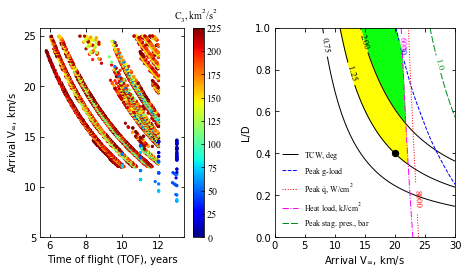

In [8]:
N1 = pd.read_excel('../interplanetary-data/Neptune/N1.xlsx', sheet_name='Sheet1')
N2 = pd.read_excel('../interplanetary-data/Neptune/N2.xlsx', sheet_name='Sheet1')
N3 = pd.read_excel('../interplanetary-data/Neptune/N3.xlsx', sheet_name='Sheet1')
N4 = pd.read_excel('../interplanetary-data/Neptune/N4.xlsx', sheet_name='Sheet1')
N5 = pd.read_excel('../interplanetary-data/Neptune/Neptune.xlsx', sheet_name='Neptune')

TOF1 = N1['Atof'].values
TOF2 = N2['Atof'].values
TOF3 = N3['Atof'].values
TOF4 = N4['Atof'].values
TOF5 = N5['TOF'].values*365.0

VINF1 = N1['Avinf'].values
VINF2 = N2['Avinf'].values
VINF3 = N3['Avinf'].values
VINF4 = N4['Avinf'].values
VINF5 = N5['ArrVinf_mag'].values

LC31 = N1['LC3'].values
LC32 = N2['LC3'].values
LC33 = N3['LC3'].values
LC34 = N4['LC3'].values
LC35 = N5['C3'].values

TOF   = np.concatenate((TOF1, TOF2, TOF3, TOF4),axis=0)
TOF_y = TOF / 365.0

VINF_kms = np.concatenate((VINF1, VINF2, VINF3, VINF4),axis=0)

LC3 = np.concatenate((LC31,LC32,LC33, LC34),axis=0)



#plt.axhline(y=13.5,linewidth=1, linestyle='dotted' ,color='black',zorder=0)
#plt.axvline(x=13.0,linewidth=1, linestyle='dotted' ,color='black',zorder=0)

fig, axes = plt.subplots(1, 2, figsize = (6.5, 3.5))
fig.tight_layout()
plt.subplots_adjust(wspace=0.30)
plt.rc('font',family='Times New Roman')
params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)

a0 = axes[0].scatter(TOF5 / 365.0, VINF5, c=LC35, cmap='jet',vmin=0, vmax=LC35.max(), zorder=10,s=5.0)
a1 = axes[0].scatter(TOF_y, VINF_kms , c=LC3, cmap='jet',vmin=0, vmax=LC35.max(), zorder=11, s=5.0)
cbar = fig.colorbar(a0, ax=axes[0])
cbar.ax.tick_params(labelsize=10) 
cbar.set_label(r'$C_3, km^2/s^2$', labelpad=-27, y=1.10, rotation=0, fontsize=10)
cbar.ax.tick_params(axis='y', direction='in')

axes[0].tick_params(direction='in')
axes[0].yaxis.set_ticks_position('both')
axes[0].xaxis.set_ticks_position('both')

axes[0].set_xlabel("Time of flight (TOF), years" ,fontsize=10)
axes[0].set_ylabel("Arrival "+r'$V_{\infty}$'+', km/s',fontsize=10)

axes[0].set_yticks(np.arange(5, 26, step=5))
axes[0].set_xticks(np.arange(6, 13, step=2))

axes[0].tick_params(axis='x',labelsize=10)
axes[0].tick_params(axis='y',labelsize=10)


x = np.loadtxt('../data/girijaSaikia2019b/'+runID+'vinf_kms_array.txt')
y = np.loadtxt('../data/girijaSaikia2019b/'+runID+'LD_array.txt')

Z1 = np.loadtxt('../data/girijaSaikia2019b/'+runID+'TCW_array.txt')
G1 = np.loadtxt('../data/girijaSaikia2019b/'+runID+'acc_net_g_max_array.txt')
Q1 = np.loadtxt('../data/girijaSaikia2019b/'+runID+'q_stag_total_max_array.txt')
H1 = np.loadtxt('../data/girijaSaikia2019b/'+runID+'heatload_max_array.txt')
S1 = np.loadtxt('../data/girijaSaikia2019b/'+runID+'stag_pres_atm_max_array.txt')


f1 = interpolate.interp2d(x, y, np.transpose(Z1), kind='cubic')	
g1 = interpolate.interp2d(x, y, np.transpose(G1), kind='cubic')
q1 = interpolate.interp2d(x, y, np.transpose(Q1), kind='cubic')
h1 = interpolate.interp2d(x, y, np.transpose(H1), kind='cubic')
s1 = interpolate.interp2d(x, y, np.transpose(S1), kind='cubic')


x_new =  np.linspace( 0.0,   30,  110)
y_new =  np.linspace( 0.0,   1.0 ,110)
z_new =  np.zeros((len(x_new),len(y_new)))

z1_new =  np.zeros((len(x_new),len(y_new)))
g1_new =  np.zeros((len(x_new),len(y_new)))
q1_new =  np.zeros((len(x_new),len(y_new)))
h1_new =  np.zeros((len(x_new),len(y_new)))
s1_new =  np.zeros((len(x_new),len(y_new)))

for i in range(0,len(x_new)):
    for j in range(0,len(y_new)):

        z1_new[i,j] = f1(x_new[i],y_new[j])
        g1_new[i,j] = g1(x_new[i],y_new[j])
        q1_new[i,j] = q1(x_new[i],y_new[j])
        h1_new[i,j] = h1(x_new[i],y_new[j])
        s1_new[i,j] = s1(x_new[i],y_new[j])


Z1 = z1_new
G1 = g1_new
Q1 = q1_new
S1 = s1_new
H1 = h1_new/1000.0

X, Y = np.meshgrid(x_new, y_new)

Zlevels = np.array([0.75,1.25,2.0])
Glevels = np.array([30.0])
Qlevels = np.array([8000.0])
Hlevels = np.array([600.0])
Slevels = np.array([1.0])



ZCS1 = axes[1].contour(X, Y, np.transpose(Z1), levels=Zlevels, colors='black')

plt.clabel(ZCS1, inline=1, fontsize=9, colors='black',fmt='%.2f',inline_spacing=1)
ZCS1.collections[0].set_linewidths(1.0)
ZCS1.collections[1].set_linewidths(1.0)
ZCS1.collections[2].set_linewidths(1.0)
ZCS1.collections[0].set_label(r'$TCW, deg$')


GCS1 = axes[1].contour(X, Y, np.transpose(G1), levels=Glevels, colors='blue', linestyles='dashed')

plt.clabel(GCS1, inline=1, fontsize=9, colors='blue',fmt='%d')
GCS1.collections[0].set_linewidths(1.0)
GCS1.collections[0].set_label(r'$Peak$'+ r' '+r'$g$'+r'-load')



QCS1 = axes[1].contour(X, Y, np.transpose(Q1), levels=Qlevels, colors='red',linestyles='dotted')

plt.clabel(QCS1, inline=1, fontsize=9, colors='red',fmt='%d')
QCS1.collections[0].set_linewidths(1.0)
QCS1.collections[0].set_label(r'$Peak$'+r' '+r'$\dot{q}$'+', '+r'$W/cm^2$')


HCS1 = axes[1].contour(X, Y, np.transpose(H1), levels=Hlevels, colors='magenta', linestyles='dashdot')
plt.xlim([0.0,30.0])
plt.clabel(HCS1, inline=1, fontsize=9, colors='magenta',fmt='%d',inline_spacing=1)
HCS1.collections[0].set_linewidths(1.0)
HCS1.collections[0].set_label(r'$Heat$'+' '+r'$ load, kJ/cm^2$')



SCS1 = axes[1].contour(X, Y, np.transpose(S1), levels=Slevels, colors='xkcd:emerald green', linestyles='dashed')
plt.xlim([0.0,30.0])
plt.clabel(SCS1, inline=1, fontsize=9, colors='xkcd:emerald green',fmt='%.1f',inline_spacing=1)
SCS1.collections[0].set_linewidths(1.0)
SCS1.collections[0].set_label(r'$Peak$'+r' '+'stag. pres., bar')

for c in SCS1.collections:
		c.set_dashes([(0.5, (7.0, 2.0))])

axes[1].tick_params(direction='in')
axes[1].yaxis.set_ticks_position('both')
axes[1].xaxis.set_ticks_position('both')

#axes[1].set(xlabel="Exam score-1", ylabel="Exam score-2")

axes[1].set_xlabel("Arrival "+r'$V_{\infty}$'+r', km/s' ,fontsize=10)
axes[1].set_ylabel("L/D",fontsize=10)

axes[1].tick_params(axis='x',labelsize=10)
axes[1].tick_params(axis='y',labelsize=10)


legend1 = axes[1].legend(loc='lower left', fontsize=8, frameon=False)

plt.scatter(19.96, 0.40, s=40, c='k', marker='o', zorder=25)

dat0 = ZCS1.allsegs[2][0]
x1,y1=dat0[:,0],dat0[:,1]
F1 = interpolate.interp1d(x1, y1, kind='linear',fill_value='extrapolate', bounds_error=False)

dat1 = GCS1.allsegs[0][0]
x2,y2=dat1[:,0],dat1[:,1]
F2 = interpolate.interp1d(x2, y2, kind='linear',fill_value='extrapolate', bounds_error=False)

dat2 = HCS1.allsegs[0][0]
x3,y3= dat2[:,0],dat2[:,1]
F3 = interpolate.interp1d(x3, y3, kind='linear',fill_value='extrapolate', bounds_error=False)


x4 = np.linspace(0,30,301)
y4 = F1(x4)
y5 = F2(x4)
y6 = F3(x4)

y7 = np.minimum(y5,y6)

plt.fill_between(x4, y4, y7, where=y4<=y7,color='xkcd:neon green')

dat0 = ZCS1.allsegs[1][0]
x1,y1=dat0[:,0],dat0[:,1]
F1 = interpolate.interp1d(x1, y1, kind='linear',fill_value='extrapolate', bounds_error=False)

dat1 = ZCS1.allsegs[2][0]
x2,y2=dat1[:,0],dat1[:,1]
F2 = interpolate.interp1d(x2, y2, kind='linear',fill_value='extrapolate', bounds_error=False)

dat2 = HCS1.allsegs[0][0]
x3,y3= dat2[:,0],dat2[:,1]
F3 = interpolate.interp1d(x3, y3, kind='linear',fill_value='extrapolate', bounds_error=False)


x4 = np.linspace(0,30,301)
y4 = F1(x4)
y5 = F2(x4)
y6 = F3(x4)

y7 = np.minimum(y5,y6)

plt.fill_between(x4, y4, y7, where=y4<=y7,color='xkcd:bright yellow')
plt.xlim([0.0,30.0])
plt.ylim([0.0,1.0])

plt.savefig('../plots/girijaSaikia2019b.png',bbox_inches='tight')
plt.savefig('../plots/girijaSaikia2019b.pdf', dpi=300,bbox_inches='tight')
plt.savefig('../plots/girijaSaikia2019b.eps', dpi=300,bbox_inches='tight')

plt.show()

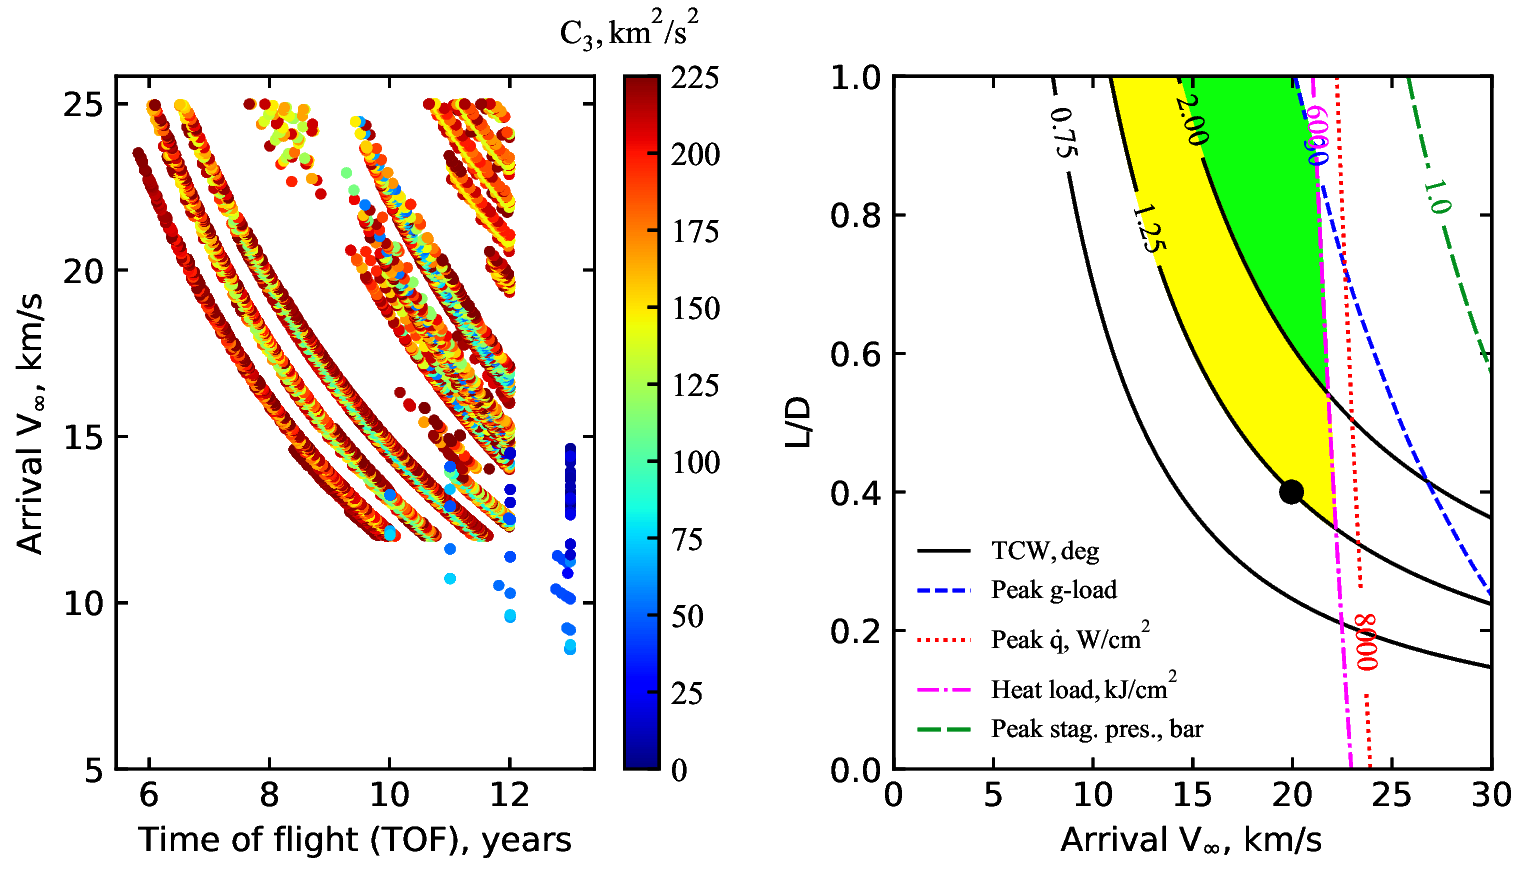

In [9]:
from IPython.display import Image
Image(filename='../plots/girijaSaikia2019b-high-res.png', width=800)

The plots are now saved in plots/girijaSaikia2019b

**Congratulations!** You have created the aerocapture feasibility chart for Neptune. The black dot indicates a baseline reference design selected for Monte Carlo analysis in the next example.